# Digital Image Processing, Assignment_1     Roll Number : 2020900001

# 1 . No Time To Die

## 1.1 Generating Fake Trail Images

### 1.1.a

In [1]:
!pip install opencv-python

In [345]:
import cv2
import numpy as np
import os 
import matplotlib
from matplotlib import pyplot as plt

In [346]:
os.chdir('E:\\iiit\\assignments\\dip\\assignment_1\\images')

In [347]:
img_1 = cv2.imread('bg.jpg')
img_2 = cv2.imread('fg.jpg')

In [348]:
print(img_1.shape)
print(img_2.shape)

(720, 1280, 3)
(720, 1280, 3)


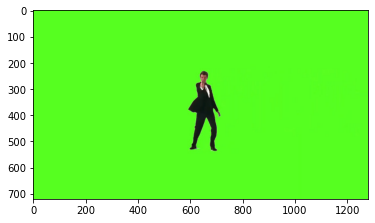

In [349]:
# Change color patterns to RGB (from BGR)
duplicate_image = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(duplicate_image)

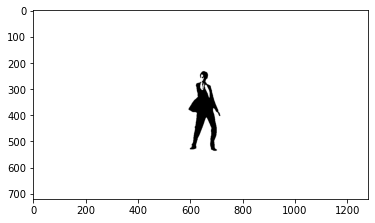

In [350]:
# Giving the boundaries for green channel
low_green = np.array([0,100,0])    
high_green = np.array([255,255,255])

cut_green = cv2.inRange(duplicate_image, low_green, high_green)

plt.imshow(cut_green,'gray')

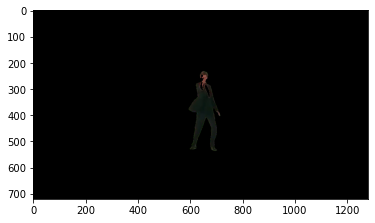

In [351]:

duplicate_image[cut_green != 0] = [0, 0, 0]

plt.imshow(duplicate_image)

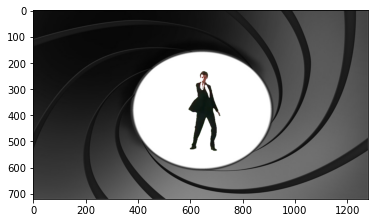

In [352]:
# combining the two images together to get a complete final image
final_im = cropped_bg + masked_image

# Display the result
plt.imshow(final_im)

### 1.1.b

In [353]:
Mansion_background = cv2.imread('Skyfall_Lodge.jpg')

In [354]:
Mansion_background.shape

(141, 275, 3)

In [355]:
# resizing the mansion image to the size of the masked one so that we can combine them
res = cv2.resize(Mansion_background, dsize=(1280, 720))

In [356]:
res.shape

(720, 1280, 3)

In [357]:
# Combining the mansion image with masked image i.e.,
Mansion_007 = res + masked_image

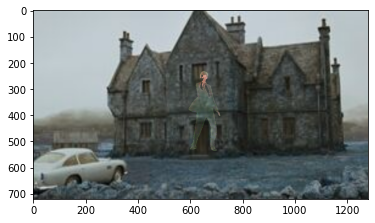

In [358]:
# Display the result
plt.imshow(Mansion_007)

### 1.1.c

In [359]:
# Taking the foreground green-screen image from 1.1.a and with background image of my choice with you in it

img_3 = cv2.imread('mallory_corrupt.jpg')
img_3 = np.array(img_3)

In [360]:
print(img_1.shape)

(720, 1280, 3)


In [361]:
print(img_3.shape)

(705, 1331, 3)


In [362]:
# resizing the image of my choice to the size of the masked one so that we can combine them
img_4 = cv2.resize(img_3, dsize=(1280, 720))

In [363]:
img_4.shape

(720, 1280, 3)

In [364]:
# img_4 also being converted RGB 
img_5 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)

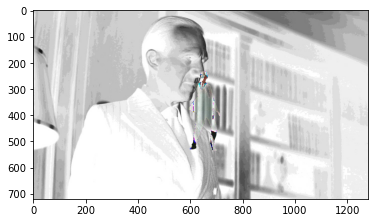

In [365]:
# Taking the masked image of 007 from 1.1.a
# Add the two images together to create a complete image!
final_img = img_5 + masked_image

# Display the result
plt.imshow(final_img)

## 1.2 Calculating the number of images you can store in cloud

Given Data,

Size of the color image we have to consider = 1280 x 720

The shape of the above image = 1280 x 720 x 3 ( Therefore it is a 3 channel image)

Size of the MI6 cloud  = 4 GB

The image we have considered is a 8-bit image, so the shape should be multiplies by 8
   i.e., 1280 x 720 x 3 x 8   

The size of the above image must be converted from bits to byte, so we have to divide the above size of the image which is in bits by 8.
   i.e., (1280 x 720 x 3 x 8)/8
   
Again the above image size will become 1280 x 720 x 3 Bytes

Converting the bytes size of image to KB, the image will be converted to (1280 x 720 x 3)/ 1024 i.e., 2700 KB

Again converting the image from KB to MB i.e., 2700/1024 gives 2.636 MB

And converting the cloud size of 4GB to MB  = 4 x 1024 MB = 4096 MB

Number of images you can store in the cloud of 4096 MB are 4096MB / 2.636MB = 1553.6 images 

Rounding the above value to its absolute we get = round(1553.6) gives 1553 images





# 2. MI6 Storage Issues

Given data,

The image is of square color image = y x y x 3 = y^2 x 3

It is a 8-bit image, then the size of image converts to y^2 x 3 x 8

Converting the above size of the image from bits to Bytes it will again changes to y^2 x 3 Bytes

The image occupies a size of 168.75 MB in M16 cloud.

Converting the image from MB to Bytes = 168.75 x 1024 x 1024 = 176947200 Bytes 

By equilating the above values 
     i.e., y^2 x 3 = 176947200
     
     y^2 = 58942400
     
     y = (58942400)^(1/2)
     
     
we get y = 7680


i.e., the shape of a square color image is 7680 x 7680 


# 3. Don't fly too close to the sun

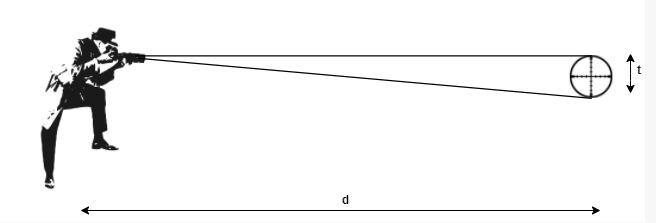

Given data,

The height of the insignia is t = 32.8cm

The camera has a square CCD sensor of dimensions 10 x 10 mm with 1024 x 1024 pixels

Focal length the camera lens is adjusted to 62.5mm

The insignia covers atleast 50 pixels in height.

By considering the camera as a Pinhole Camera,

The visual representation of the optics of pinhole camera has been represented below

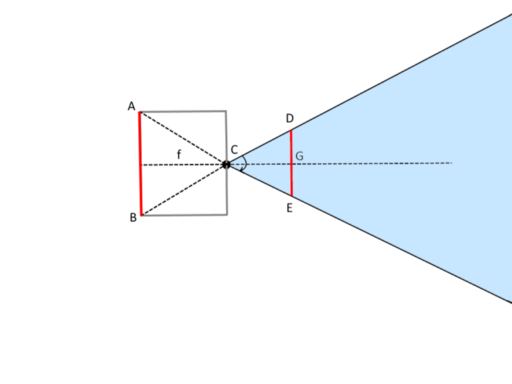



From the above fig,

Triangles ABC and CDE are concurrent.

Then,

(AB/f) = (DE/CG) --------- (1)

Here,

AB, the height of insignia on CCD sensor should be in mm but it has been given as 50 Pixels

So, we should map 1024 pixels to 10 mm. Then, 50 pixels are mapped to 

(50pixels x 10mm)/1024pixels = 0.488mm


Finally, the height of insignia on CCD sensor = 0.488mm = AB

f, the focal length of the caamera = 62.5mm

The height of insignia t = DE = 32.8cm = 32.8 x 10mm = 328mm

From the equation (1),

(0.488mm)/(62.5mm) = (328mm)/CG

Then,

CG = d = (328mm x 62.5mm)/(0.488mm)

that gives,

d = CG = 42008.196mm = 42.008 Metres 

Rounding the above value to its nearest integer, d = CG = 42 Metre


# 4. Le Chiffre Strikes Again!

## 4.1 function of bitQuantizeImage  

In [366]:
# The function bitQuantizeImage which takes an 8-bit image im and k, the number of bits to which the image needs to be quantized to and returns the k-bit quantized image


def BitQuantizeImage(im,k):
    output_img = im*((2**k -1)/255)
    return output_img.astype(np.uintk)

## 4.2 Running the above function on selected image for different k values ( k = 1 to k = 8 )

In [367]:
im = cv2.imread('007_test1.png') # reading the required image

In [368]:
im.shape # checking the shape of the image

(792, 1887, 3)

In [369]:
# Change color from BGR to RGB
convert_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [370]:
convert_im.shape # checking the rgb image shape

(792, 1887, 3)

In [371]:
convert_im_gray = cv2.cvtColor(convert_im, cv2.COLOR_RGB2GRAY)

In [372]:
convert_im_gray.shape

(792, 1887)

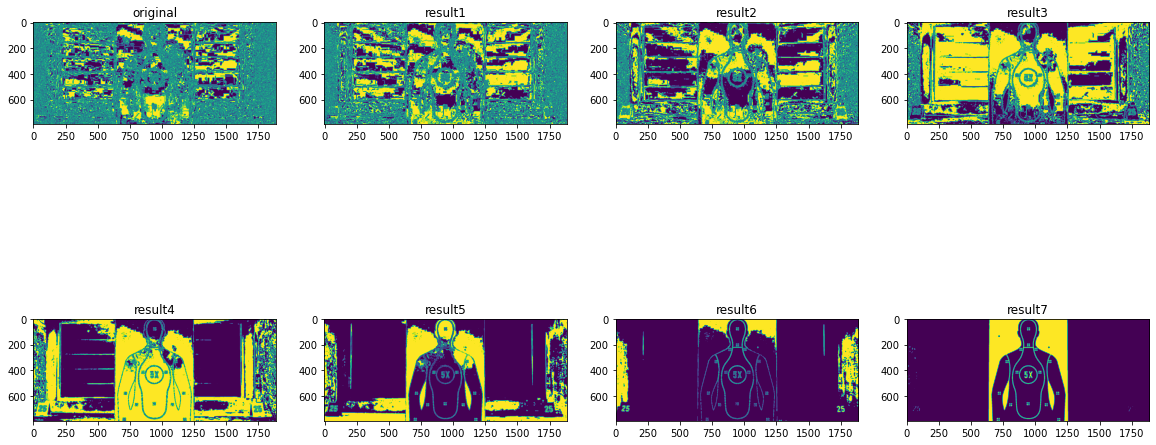

In [373]:
out = np.array([convert_im_gray & 1, 
                convert_im_gray & 2, 
                convert_im_gray & 4, 
                convert_im_gray & 8, 
                convert_im_gray & 16, 
                convert_im_gray & 32, 
                convert_im_gray & 64, 
                convert_im_gray & 128])
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,4,1)
plt.title('original')
plt.imshow(out[0]) 
plt.subplot(2,4,2)
plt.title('result1')
plt.imshow(out[1]) 
plt.subplot(2,4,3)
plt.title('result2')
plt.imshow(out[2]) 
plt.subplot(2,4,4)
plt.title('result3')
plt.imshow(out[3]) 
plt.subplot(2,4,5)
plt.title('result4')
plt.imshow(out[4]) 
plt.subplot(2,4,6)
plt.title('result5')
plt.imshow(out[5]) 
plt.subplot(2,4,7)
plt.title('result6')
plt.imshow(out[6]) 
plt.subplot(2,4,8)
plt.title('result7')
plt.imshow(out[7])
plt.show()

## 4.3 Applying the above fiunction on the different image  

In [374]:
im1 = cv2.imread('007_test2.png') # reading the required image

In [375]:
im1.shape

(776, 718, 3)

In [376]:
# Change color to RGB (from BGR)
convert_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

In [377]:
convert_im1.shape

(776, 718, 3)

In [378]:
convert_im1_gray = cv2.cvtColor(convert_im1, cv2.COLOR_RGB2GRAY) # converting the RGB image to grayscale

In [379]:
convert_im1_gray.shape

(776, 718)

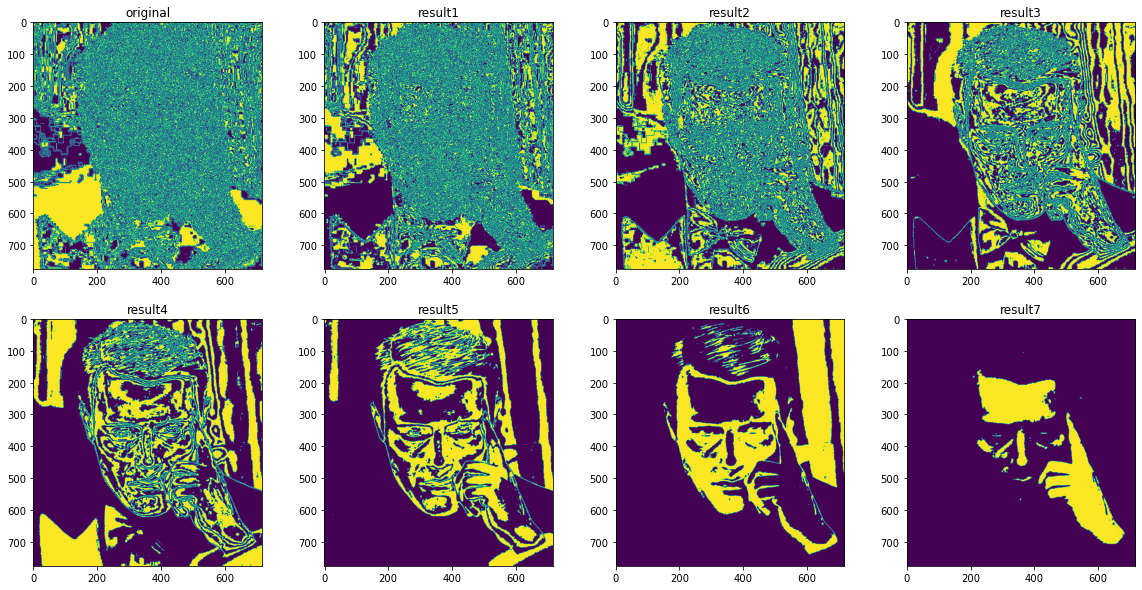

In [380]:
out1 = np.array([convert_im1_gray & 1, 
                 convert_im1_gray & 2, 
                 convert_im1_gray & 4, 
                 convert_im1_gray & 8, 
                 convert_im1_gray & 16, 
                 convert_im1_gray & 32, 
                 convert_im1_gray & 64, 
                 convert_im1_gray & 128])
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,4,1)
plt.title('original')
plt.imshow(out1[0]) 
plt.subplot(2,4,2)
plt.title('result1')
plt.imshow(out1[1]) 
plt.subplot(2,4,3)
plt.title('result2')
plt.imshow(out1[2]) 
plt.subplot(2,4,4)
plt.title('result3')
plt.imshow(out1[3]) 
plt.subplot(2,4,5)
plt.title('result4')
plt.imshow(out1[4]) 
plt.subplot(2,4,6)
plt.title('result5')
plt.imshow(out1[5]) 
plt.subplot(2,4,7)
plt.title('result6')
plt.imshow(out1[6]) 
plt.subplot(2,4,8)
plt.title('result7')
plt.imshow(out1[7])
plt.show()

## 4.4  Applying the bitQuantizeImage function on the desired image with corresponding 'k' value

In [381]:
# Calculating the modulus of my roll number against 5. Say it is 'k'

k = 2020900001%5

print(k)

1


In [382]:
# for k = 1 the image we should take is Moneypenny

person = cv2.imread('moneypenny.webp')

In [383]:
person_corrupt = cv2.imread('moneypenny_corrupt.jpg')

In [384]:
person.shape

(350, 590, 3)

In [385]:
person_gray = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY) # converting the RGB image to grayscale

In [386]:
out_person_gray = np.array([person_gray & 1, 
                            person_gray & 2, 
                            person_gray & 4, 
                            person_gray & 8, 
                            person_gray & 16, 
                            person_gray & 32, 
                            person_gray & 64, 
                            person_gray & 128])

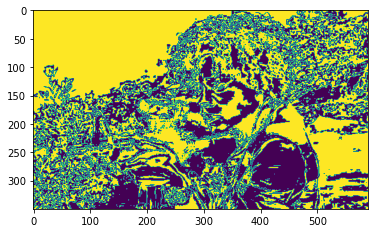

In [387]:
# taking the bit quantized image of our choice
personre = out_person_gray[5]
plt.imshow(out_person_gray[5]) 

In [388]:
# function for getting the negative form of the source image
# here, image = source image, max_pixel = maximum pixel value in the source image
def img_neg(image, max_pixel):
    v = max_pixel-image
    return v

In [389]:
personre=np.array(personre)
b = np.max(personre)

In [390]:
sssss = img_neg(personre, b)

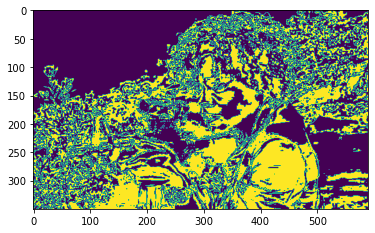

In [391]:
plt.imshow(sssss)

# 5. 007 and Quantum

## 5.1 Writing a function linContrastStretching which takes any image im, within the range of intensities [a,b]

In [392]:
def contrast_stretching(im,maxv,minv,a,b,h,w):    
    result = im
    for i in range(0,h-1,1):
        for j in range(0,w-1,1):
            temp =int(a) + (((im[i,j]-minv)/(maxv-minv))*(int(b)-int(a)))
            result[i,j]= temp
    return result



# where im is the image for which we have to do contrast stretching
# maxv and minv are the minimum value and maximum value of the image im
# a and b are therange of intensities for which we have to apply contrast stretching
# h and w are the shape of the image

## 5.2 Applying the above function on the corresponding image with in the range of intensities [a,b] 

In [393]:
im_color = cv2.imread('quantum_bad.jpg') # reading the required image
print(im_color.shape)
print('\n')
im = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)# converting BGR image to grayscale
print(im.shape)
print('\n')
minv = np.min(im)
print(minv)
print('\n')
maxv = np.max(im)
print(maxv)
print('\n')
h, w = im.shape[:2]
print(h)
print('\n')
print(w)

(921, 1777, 3)


(921, 1777)


0


80


921


1777


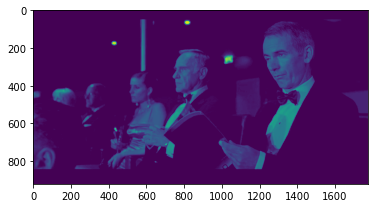

In [394]:
plt.imshow(im) # showing the grayscaled image

In [395]:
a = input("enter the minimum of the new dynamic range : ")

b = input("enter the maximum of the new dynamic range : ")
print('\n')
print(a)
print('\n')
print(b)

enter the minimum of the new dynamic range : 44
enter the maximum of the new dynamic range : 55


44


55


In [396]:
image1 = contrast_stretching(im,maxv,minv,a,b,h,w)

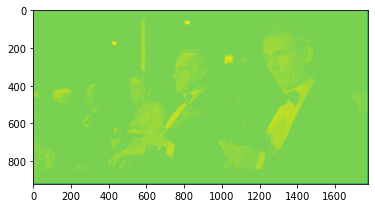

In [397]:
plt.imshow(image1) # plotting the contrast stretched image

# 6.Think about your sins!

## 6.1 Writing a function histEqualization for a given corresponding image ( Grayscale one )

In [398]:
def df(img):  # to make a histogram of the grayscale image (count distribution frequency)
    values = [0]*256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values[img[i,j]]+=1
    return values

In [399]:
def cdf(hist):  # cumulative distribution frequency of the above histogram and 'hist' is the ouyput image of above function
    cdf = [0] * len(hist)   #len(hist) is 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i]= cdf[i-1]+hist[i]
    # Now we normalize the histogram
    cdf = [ele*255/cdf[-1] for ele in cdf]      # What your function h was doing before
    return cdf

In [400]:
def histEqualization(img):      # function of the histogram equalization 
    my_cdf = cdf(df(img))
    # use linear interpolation of cdf to find new pixel values
    import numpy as np
    image_equalized = np.interp(img, range(0,256), my_cdf)
    return image_equalized

## 6.2 Writing a function histMatching for the given input image 

In [401]:
def find_nearest_above(my_array, target): # my_array is the image for histogram matching and target is the specifies image for histogram matching
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [402]:
def histMatching(input_img, reference_img):

    input_img_shape = input_img.shape
    input_img = input_img.ravel()
    reference_img = reference_img.ravel()

    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(input_img, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(reference_img, return_counts=True)

    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # Round the values
    source = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in source[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')

    return b[bin_idx].reshape(input_img_shape)

## 6.3 Mathematical formulae for the function used above

Histogram Equalization formula

h ( i ) = Pi 
          
          = ( number of pixels of intensity level I ) / ( total number of pixels )
          
          = Normalized histogram
          
          = Probability Density Function PDF
          
          
CDF = H ( j ) = ∑_(i=0)^j▒h(i)           where j = 0,1,2,3, ……………… 254, 255


H(255) = 1


T ( j ) = floor ((k-1) x CDFj )


Histogram Matching formula

Pr ( r ) = PDF of the input image

Pz ( z ) = PDF of the output image

R and z are the gray levels of input and output image.

 s = T(r) = ∫_0^r▒P(w)dw

G(z) = ∫_0^z▒P(t)dt = s

Z = G-1(s) = G-1[T(r)]


## 6.4 Performing the histEqualization  and histMatching on the given images

In [403]:
# histEqualization on practice_range1.jpg

image_he= cv2.imread('practice_range1.jpg')
print(image_he.shape)

(667, 1000, 3)


In [404]:
# converting the bgr image to grayscale

image_he_gray = cv2.cvtColor(image_he, cv2.COLOR_BGR2GRAY)
print( image_he_gray.shape )

(667, 1000)


(667, 1000)


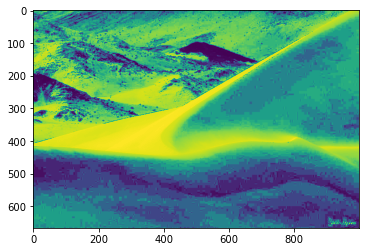

In [405]:
# applying histEqualization function on image_he_gray
eq = histEqualization(image_he_gray)

print(eq.shape)


plt.imshow(eq)


In [406]:
# histEqualization on hist.png

image_he_1= cv2.imread('hist.png')
print(image_he_1.shape)

(370, 524, 3)


In [407]:
# converting the bgr image to grayscale

image_he_gray_1 = cv2.cvtColor(image_he_1, cv2.COLOR_BGR2GRAY)
print( image_he_gray_1.shape )

(370, 524)


(370, 524)


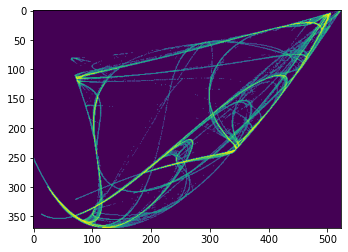

In [408]:
# applying histEqualization function on image_he_gray
eq_1 = histEqualization(image_he_gray_1)

print(eq_1.shape)


plt.imshow(eq_1)


In [409]:
# Reading the images for the histMatching function
im_hm_input = cv2.imread('Map.jpg')
im_hm_reference = cv2.imread('satellite_img.jpg')

In [410]:
print(im_hm_input.shape)
print(im_hm_reference.shape)

(2012, 3000, 3)
(1067, 1555, 3)


In [411]:
# converting the bgr images to grayscale
im_hm_input_gray= cv2.cvtColor(im_hm_input, cv2.COLOR_BGR2GRAY)
im_hm_reference_gray = cv2.cvtColor(im_hm_reference, cv2.COLOR_BGR2GRAY)
print(im_hm_input_gray.shape)
print(im_hm_reference_gray.shape)

(2012, 3000)
(1067, 1555)


In [412]:
# perform Histogram Matching
a = histMatching( im_hm_input_gray, im_hm_reference_gray)

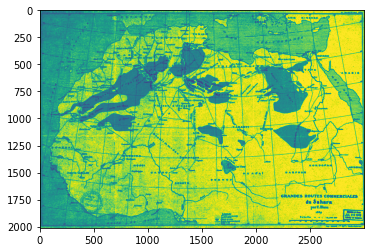

In [413]:
plt.imshow(a)


# 8. Tomorrow Never Dies

## 8.1 Writing a function gammaTransform

In [414]:
# Gamma Transformation user defined function
def gammaTransform(img, gamma):
    result = img
    h, w = img.shape[:2]
    i = j = 0
    for i in range(h):
        for j in range(w):
            temp  =255*((img[i,j] / 255) ** gamma)
        result[i,j]= temp
    return result

## 8.2 Using the above function on given image

In [415]:
im_gt = cv2.imread('stealth.png')
print(im_gt.shape)
img_gt=cv2.cvtColor(im_gt,cv2.COLOR_BGR2GRAY) 
print(img_gt.shape)

(821, 1920, 3)
(821, 1920)


In [416]:
# converting the grayscaled image to an array 
img_gt = np.array(img_gt)

In [417]:
gamma = 0.4

In [418]:
# applying the gamma transformation function for the gamma value of 0.4
img2_gt = gammaTransform(img_gt,gamma)

In [419]:
img2_gt= np.array(img2_gt)

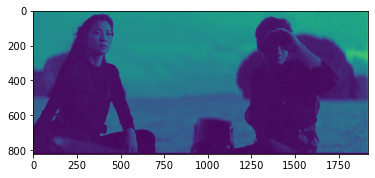

In [420]:
plt.imshow(img2_gt)

## 8.3  Using the gamma transformation function on unstealth image

(820, 1098, 3)
(820, 1098)


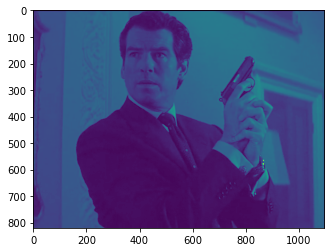

In [421]:
im_gt1 = cv2.imread('unstealth.png')
print(im_gt1.shape)
img_gt1=cv2.cvtColor(im_gt1,cv2.COLOR_BGR2GRAY) 
print(img_gt1.shape)

# converting the grayscaled image to an array 
img_gt1 = np.array(img_gt1)

gamma1 = 4

# applying the gamma transformation function for the gamma value of 4 to hide the person
img2_gt1 = gammaTransform(img_gt1,gamma1)

img2_gt1= np.array(img2_gt1)


plt.imshow(img2_gt1)

## 8.4 Using the above function on your Aston Martin DBS image 

(788, 1307, 3)
(788, 1307)


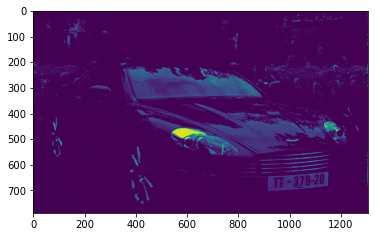

In [422]:
im_gt11 = cv2.imread('aston_invisible.jpg')
print(im_gt11.shape)
img_gt11=cv2.cvtColor(im_gt11,cv2.COLOR_BGR2GRAY) 
print(img_gt11.shape)

# converting the grayscaled image to an array 
img_gt11 = np.array(img_gt11)

gamma11 = 0.05

# applying the gamma transformation function for the gamma value of 0.05 to see the number plate of the car clearly
img2_gt11 = gammaTransform(img_gt11,gamma11)

img2_gt11= np.array(img2_gt11)


plt.imshow(img2_gt11)




# And the number plate id TT-378-20

# 9. Is that the best you got?

The name of the person which we have seen on the Map.jpg is 'vesper'. So, using this link by putting the name with all lowercase letters:
https://tinyurl.com/<vesper>-dead

we are redirected to drive folder in which we have got four split images of one source image

In [423]:
os.chdir('E:\\iiit\\assignments\\dip\\assignment_1\\images\\Assignment_1_Secret_Resource')

In [424]:
piece1 = cv2.imread('james1.jpg')
piece2 = cv2.imread('james2.jpg')
piece3 = cv2.imread('james3.jpg')
piece4 = cv2.imread('james4.jpg')

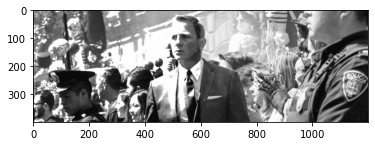

In [425]:
# horizontally concatenates images of same height 
jamesh1 = cv2.hconcat([piece1, piece2,]) 

# show the output image 
plt.imshow( jamesh1)

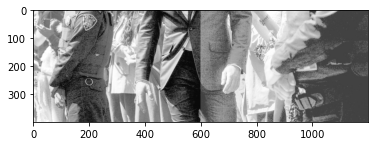

In [426]:
jamesh2 = cv2.hconcat([piece3, piece4]) 

# show the output image 
plt.imshow(jamesh2) 

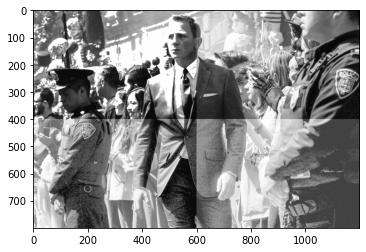

In [427]:
# vertically concatinating the above two horizontally concatinaated images
final = cv2.vconcat([jamesh1,jamesh2]) 

# show the output image 
plt.imshow(final)

In [428]:
final.shape

(800, 1200, 3)

In [429]:
final_gray = cv2.cvtColor(final,cv2.COLOR_BGR2GRAY)
print(final_gray.shape)

(800, 1200)


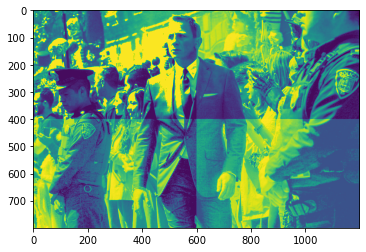

In [430]:
plt.imshow(final_gray)

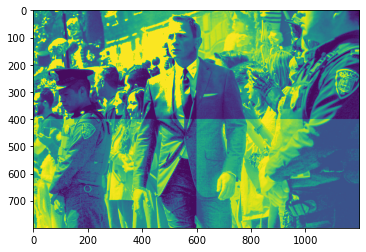

In [431]:
# applying the gamma transformation on the final grayscaled image

final_gray = np.array(final_gray)

gamma5 = 0.3

# applying the gamma transformation function for the gamma value of 0.3 to hide the person
final_gamma = gammaTransform(final_gray,gamma5)

final_gamma= np.array(final_gamma)


plt.imshow(final_gamma)

(800, 1200)


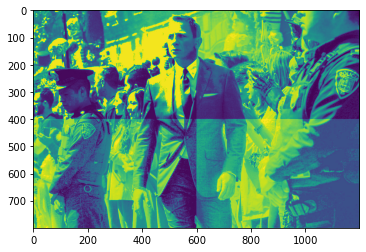

In [432]:
# applying the histogram equalization on the final gray image

eq1 = histEqualization(final_gray)

print(eq1.shape)


plt.imshow(eq1)


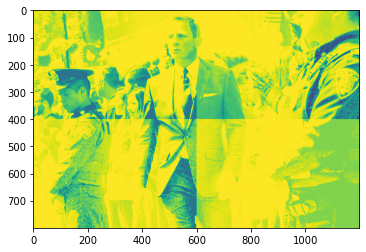

In [433]:
a1 = histMatching( eq1, im_hm_reference_gray)

plt.imshow(a1)